In [1]:
from luxai_s2.env import LuxAI_S2
# from luxai_s2.map.board import Board
# from luxai_s2.map_generator.generator import GameMap
import matplotlib.pyplot as plt
import matplotlib
import logging
import numpy as np
# from luxai_s2.utils import my_turn_to_place_factory
from agents_experiments import (IdleAgent, ControlledAgent, interact)
# from plots import plot_factory_stats, plot_robot_stats
# import uuid
# from IPython.display import Video
from pprint import pprint
# from robots import CartesianPoint
# import pandas as pd
# import seaborn as sns

matplotlib.rc('font', size=14)
logger = logging.getLogger()

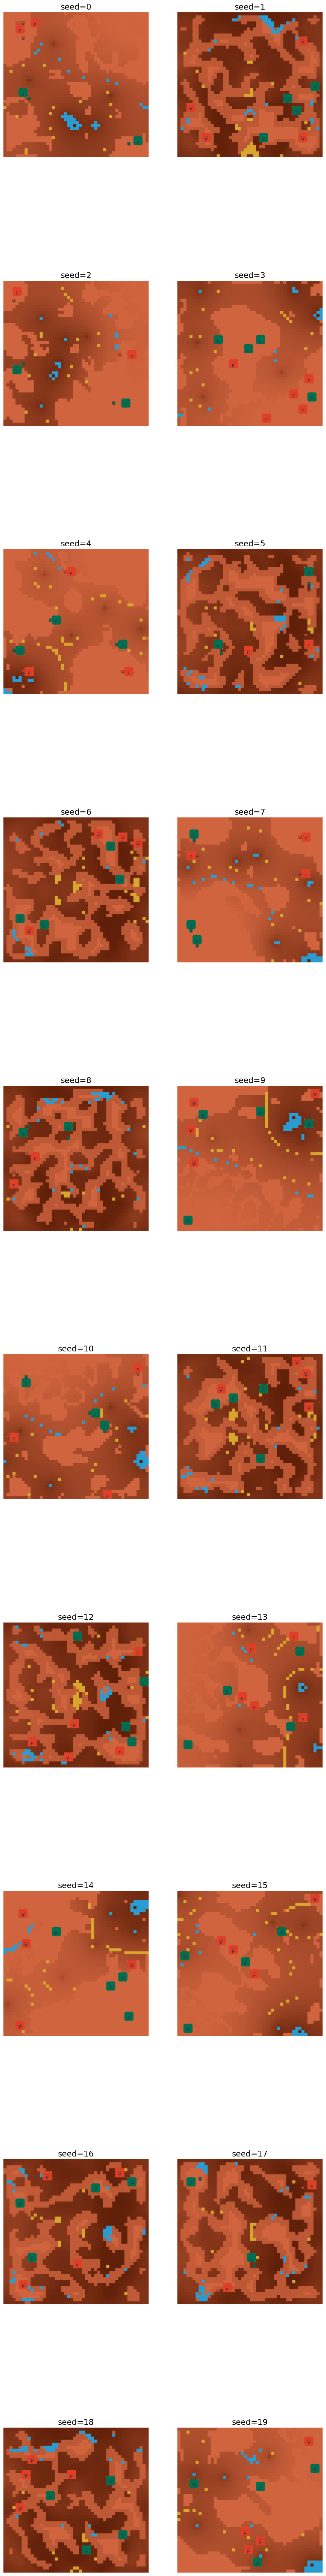

In [2]:
logger.setLevel(logging.INFO)
NUM_SEEDS = 20
f, axes = plt.subplots(NUM_SEEDS // 2, 2, figsize=(12, 5 * NUM_SEEDS))
for seed, ax in enumerate(axes.ravel()):
    env = LuxAI_S2()
    obs = env.reset(seed=seed)

    # filename = str(uuid.uuid4()) + '.mp4'
    file_path = '/home/adrian_admin/prog/kaggle/lux-ai-2/Lux-Design-S2/data/experiments/adrian/'
    animate_arg = ''  # file_path + filename

    agents = {}
    for player, agent_constructor in zip(env.agents, [ControlledAgent, ControlledAgent]):
        logging.debug(player)
        agents[player] = agent_constructor(player, env.state.env_cfg) 

    last_obs = interact(
        env, 
        agents, 
        10, 
        animate_=animate_arg, 
        break_at_first_action=False, 
        debug=False, 
        custom_board=None,  #simple_board
        seed=seed
    )
    
    img = env.render("rgb_array", width=640, height=640)
    ax.imshow(img);
    ax.axis('off');
    ax.set_title('seed={}'.format(seed))
# print(last_obs)